<a href="https://colab.research.google.com/github/felinelson/opendataproject/blob/main/Felipe_Nelson_Proyecto_Open_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Esto abrirá una ventana para seleccionar el archivo que quieres subir
uploaded = files.upload()


Saving satisfaccion_solicitudes_2021.xlsx to satisfaccion_solicitudes_2021.xlsx


In [ ]:
import pandas as pd

# Asegúrate de reemplazar 'satisfaccion_solicitudes_2021.xlsx' con el nombre real de tu archivo
file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name)

# Mostrar las primeras filas del DataFrame para verificar la carga correcta
data.head()

,anho,institucion,enlace,satisfaccion
0,2021,Administración Nacional de Electricidad (ANDE),http://informacionpublica.paraguay.gov.py/port...,0
1,2021,Administración Nacional de Electricidad (ANDE),http://informacionpublica.paraguay.gov.py/port...,0
2,2021,Administración Nacional de Electricidad (ANDE),http://informacionpublica.paraguay.gov.py/port...,1
3,2021,Administración Nacional de Electricidad (ANDE),http://informacionpublica.paraguay.gov.py/port...,1
4,2021,Administración Nacional de Electricidad (ANDE),http://informacionpublica.paraguay.gov.py/port...,0


In [ ]:
# Distribución y proporción de satisfacción
satisfaction_counts = data['satisfaccion'].value_counts()
satisfaction_proportion = data['satisfaccion'].value_counts(normalize=True)

# Satisfacción por institución
satisfaction_by_institution = data.groupby('institucion')['satisfaccion'].value_counts(normalize=True).unstack()

# Renombrar las columnas para mayor claridad
satisfaction_by_institution.columns = ['Satisfecho (0)', 'No Satisfecho (1)']

# Mostrar los resultados
satisfaction_counts, satisfaction_proportion, satisfaction_by_institution.head()


(satisfaccion
 0    333
 1    218
 Name: count, dtype: int64,
 satisfaccion
 0    0.604356
 1    0.395644
 Name: proportion, dtype: float64,
                                                 Satisfecho (0)  \
 institucion                                                      
 Administración Nacional de Electricidad (ANDE)        0.833333   
 Agencia Financiera de Desarrollo (AFD)                1.000000   
 Auditoría General del Poder Ejecutivo (AGPE)          1.000000   
 Banco Central del Paraguay (BCP)                      0.333333   
 Banco Nacional de Fomento (BNF)                            NaN   
 
                                                 No Satisfecho (1)  
 institucion                                                        
 Administración Nacional de Electricidad (ANDE)           0.166667  
 Agencia Financiera de Desarrollo (AFD)                        NaN  
 Auditoría General del Poder Ejecutivo (AGPE)                  NaN  
 Banco Central del Paraguay (BCP)          

<ipython-input-29-5d54c9663d5e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='satisfaccion', data=data, palette='viridis')


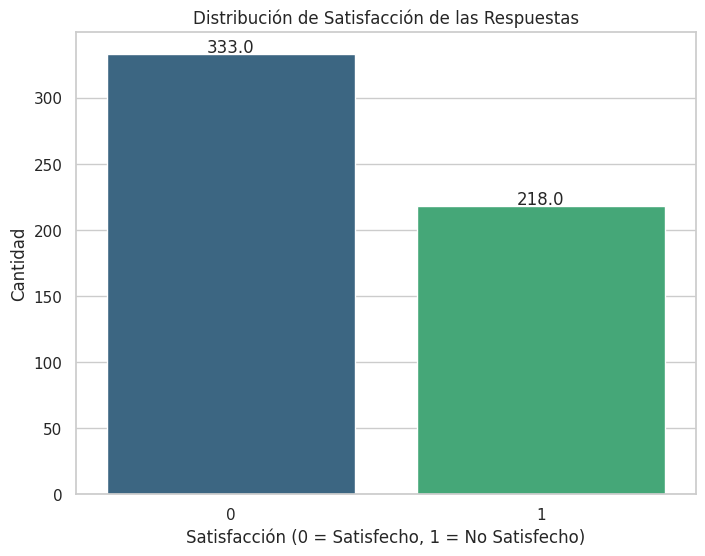

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")

# Gráfico de barras para la distribución global de satisfacción
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='satisfaccion', data=data, palette='viridis')

# Agregar texto con el valor exacto de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribución de Satisfacción de las Respuestas')
plt.xlabel('Satisfacción (0 = Satisfecho, 1 = No Satisfecho)')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
institutions_counts = data['institucion'].value_counts()

In [ ]:
top_10_institutions = institutions_counts.head(10).index


In [ ]:
top_10_data = data[data['institucion'].isin(top_10_institutions)]


In [ ]:
top_10_satisfaction_by_institution = top_10_data.groupby('institucion')['satisfaccion'].value_counts(normalize=True).unstack()
top_10_satisfaction_by_institution.columns = ['Satisfecho (0)', 'No Satisfecho (1)']


In [ ]:
top_10_satisfaction_by_institution_long = top_10_satisfaction_by_institution.reset_index().melt(id_vars='institucion', var_name='Satisfacción', value_name='Proporción')


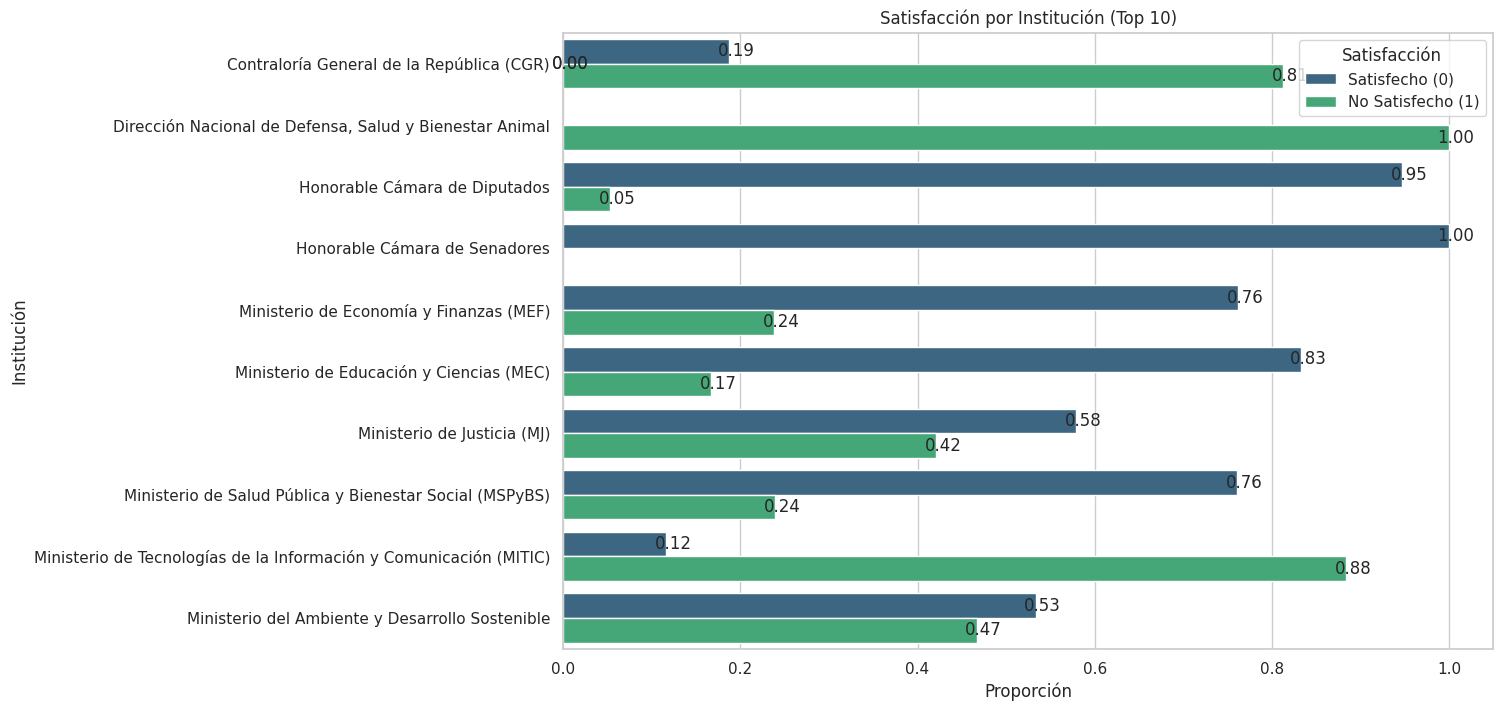

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para la satisfacción por institución
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Proporción', y='institucion', hue='Satisfacción', data=top_10_satisfaction_by_institution_long, palette='viridis')

# Agregar texto con la proporción exacta de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(5, 0), textcoords='offset points')

plt.title('Satisfacción por Institución (Top 10)')
plt.xlabel('Proporción')
plt.ylabel('Institución')
plt.legend(title='Satisfacción')
plt.show()


In [ ]:
# Filtrar las respuestas insatisfechas
unsatisfied_data = data[data['satisfaccion'] == 1]

# Contar las respuestas insatisfechas por institución
unsatisfied_counts_by_institution = unsatisfied_data['institucion'].value_counts()

# Mostrar las top 10 instituciones con más respuestas insatisfechas
top_unsatisfied_institutions = unsatisfied_counts_by_institution.head(10)
top_unsatisfied_institutions


institucion
Dirección Nacional de Defensa, Salud y Bienestar Animal               39
Ministerio de Tecnologías de la Información y Comunicación (MITIC)    38
Contraloría General de la República (CGR)                             13
Ministerio de Salud Pública y Bienestar Social (MSPyBS)               11
Ministerio de Economía y Finanzas (MEF)                               10
Ministerio de Justicia (MJ)                                            8
Ministerio del Ambiente y Desarrollo Sostenible                        7
Municipalidad de Asunción                                              5
Banco Central del Paraguay (BCP)                                       4
Instituto Forestal Nacional (INFONA)                                   4
Name: count, dtype: int64

<ipython-input-31-7a269a447572>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_unsatisfied_institutions.values, y=top_unsatisfied_institutions.index, palette='viridis')


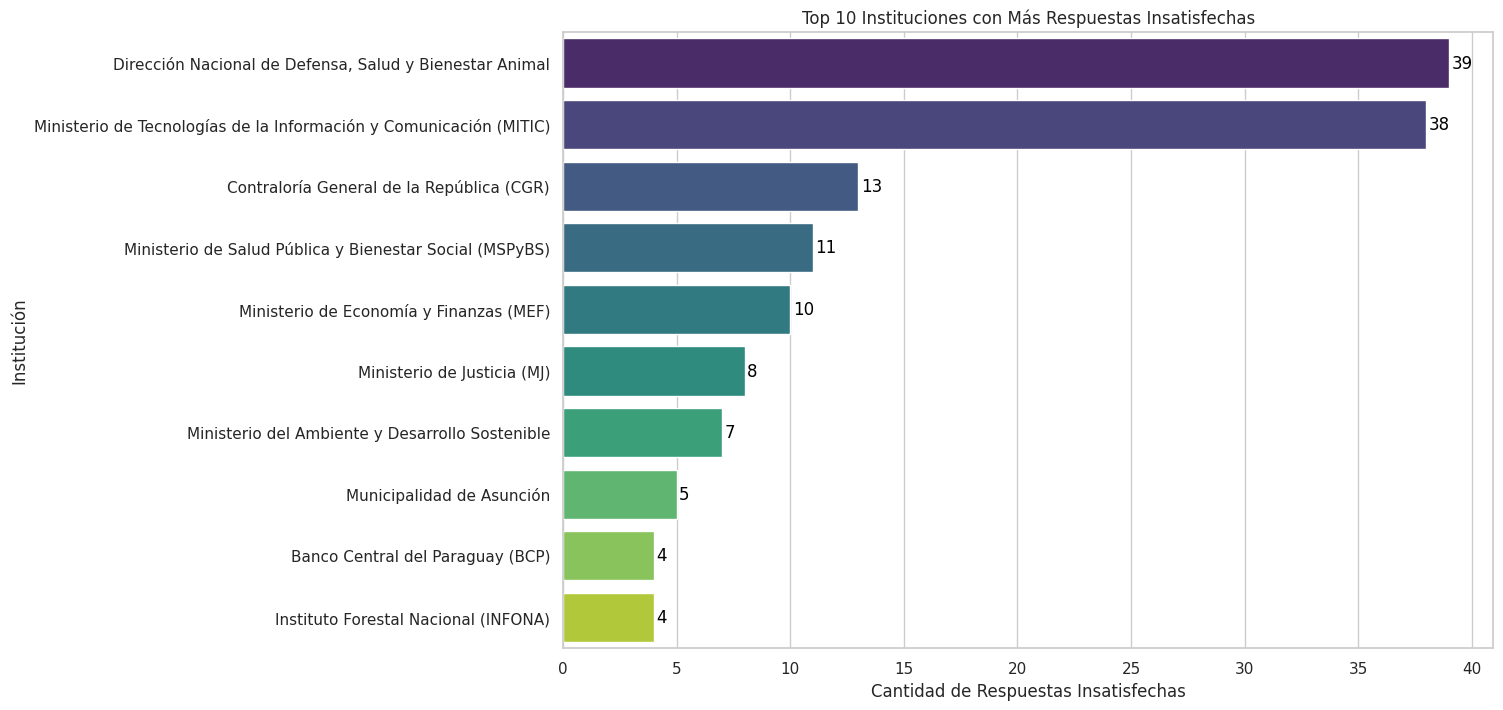

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para las top 10 instituciones con más respuestas insatisfechas
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_unsatisfied_institutions.values, y=top_unsatisfied_institutions.index, palette='viridis')

# Agregar texto con la cantidad exacta de respuestas insatisfechas en cada barra
for i, v in enumerate(top_unsatisfied_institutions.values):
    ax.text(v + 0.1, i, str(v), ha='left', va='center', color='black')

plt.title('Top 10 Instituciones con Más Respuestas Insatisfechas')
plt.xlabel('Cantidad de Respuestas Insatisfechas')
plt.ylabel('Institución')
plt.show()


In [ ]:
# Filtrar las respuestas satisfactorias
satisfied_data = data[data['satisfaccion'] == 0]

# Contar las respuestas satisfactorias por institución
satisfied_counts_by_institution = satisfied_data['institucion'].value_counts()

# Mostrar las top 10 instituciones con más respuestas satisfactorias
top_satisfied_institutions = satisfied_counts_by_institution.head(10)
top_satisfied_institutions


institucion
Ministerio de Salud Pública y Bienestar Social (MSPyBS)    35
Ministerio de Economía y Finanzas (MEF)                    32
Honorable Cámara de Senadores                              27
Ministerio de Educación y Ciencias (MEC)                   20
Honorable Cámara de Diputados                              18
Ministerio de Obras Públicas y Comunicaciones (MOPC)       11
Ministerio de Justicia (MJ)                                11
Ministerio de Industria y Comercio (MIC)                   11
Administración Nacional de Electricidad (ANDE)             10
Instituto Nacional de Estadísticas (INE)                    8
Name: count, dtype: int64

<ipython-input-32-2c8de459bf6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_satisfied_institutions.values, y=top_satisfied_institutions.index, palette='viridis')


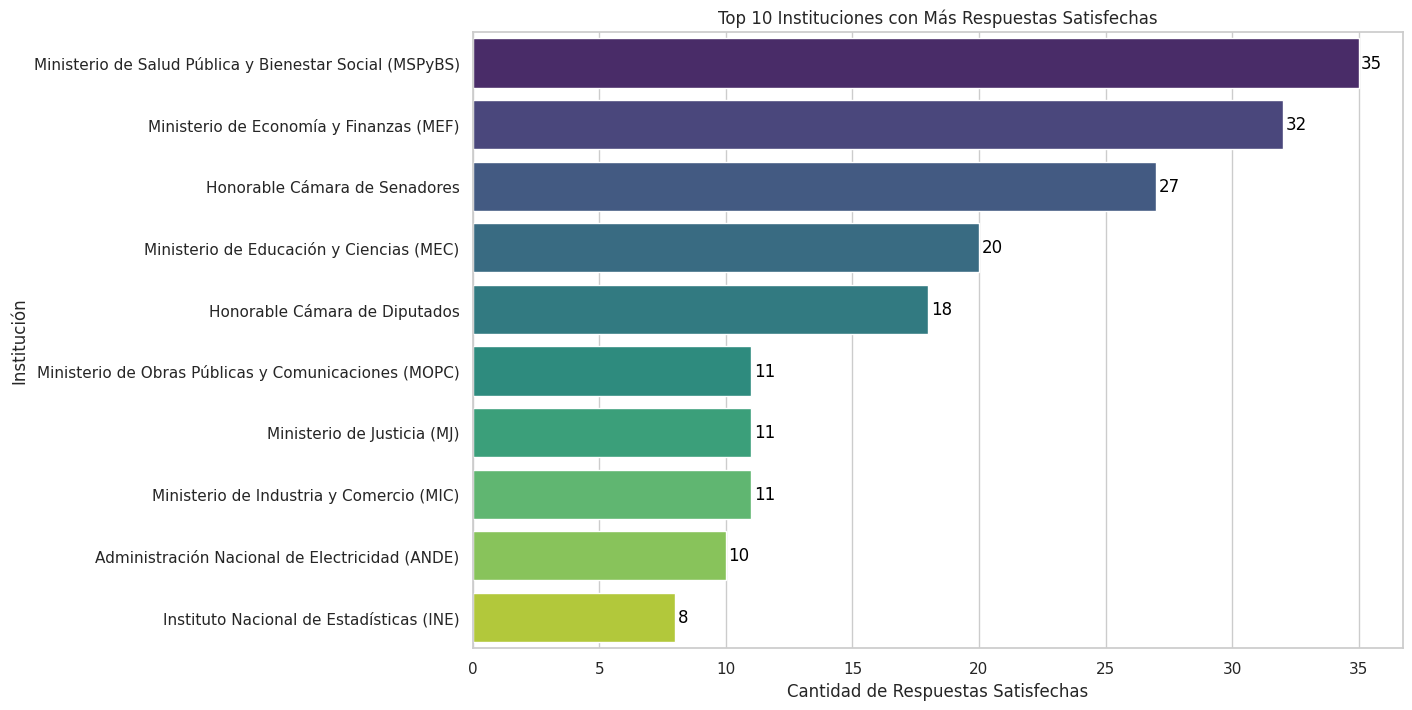

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para las top 10 instituciones con más respuestas satisfechas
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_satisfied_institutions.values, y=top_satisfied_institutions.index, palette='viridis')

# Agregar texto con la cantidad exacta de respuestas satisfechas en cada barra
for i, v in enumerate(top_satisfied_institutions.values):
    ax.text(v + 0.1, i, str(v), ha='left', va='center', color='black')

plt.title('Top 10 Instituciones con Más Respuestas Satisfechas')
plt.xlabel('Cantidad de Respuestas Satisfechas')
plt.ylabel('Institución')
plt.show()


In [ ]:
count_satisfaccion = data.groupby('institucion')['satisfaccion'].value_counts().unstack().fillna(0)

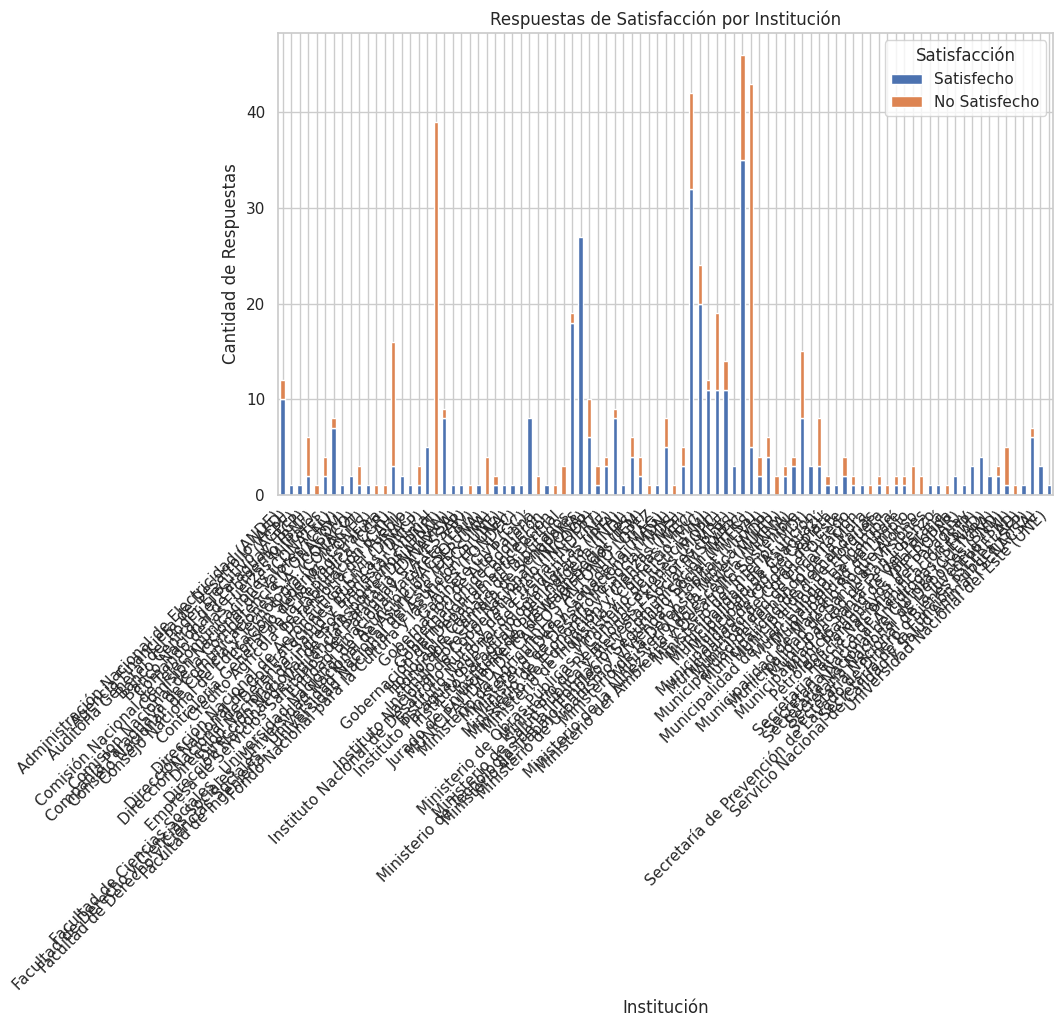

In [ ]:
count_satisfaccion.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Respuestas de Satisfacción por Institución')
plt.xlabel('Institución')
plt.ylabel('Cantidad de Respuestas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Satisfacción', labels=['Satisfecho', 'No Satisfecho'])
plt.show()

In [ ]:
count_satisfaccion = data.groupby('institucion')['satisfaccion'].value_counts().unstack().fillna(0)

In [ ]:
top_15_instituciones = count_satisfaccion.sum(axis=1).nlargest(15).index
data_top_15 = data[data['institucion'].isin(top_15_instituciones)]
count_satisfaccion_top_15 = data_top_15.groupby('institucion')['satisfaccion'].value_counts().unstack().fillna(0)

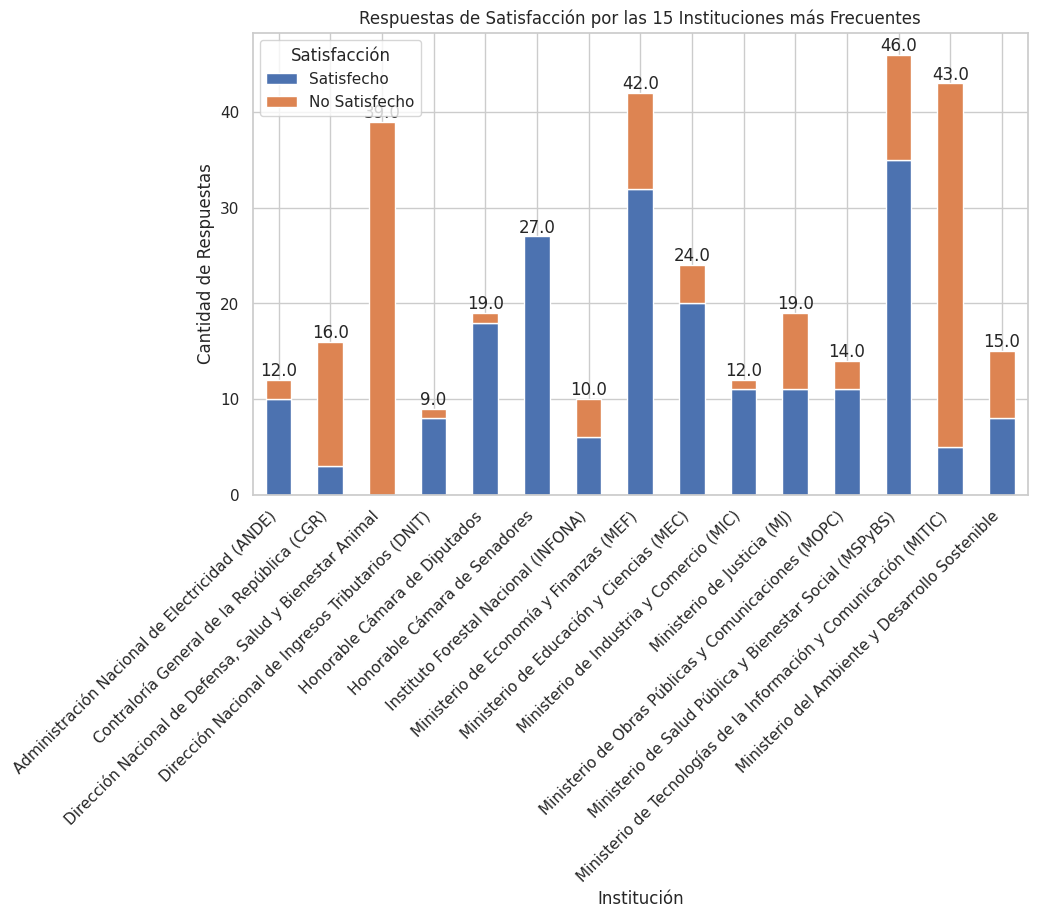

In [ ]:
count_satisfaccion_top_15.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Respuestas de Satisfacción por las 15 Instituciones más Frecuentes')
plt.xlabel('Institución')
plt.ylabel('Cantidad de Respuestas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Satisfacción', labels=['Satisfecho', 'No Satisfecho'])

# Agregar texto con los valores exactos en cada segmento de barra
for i in range(len(count_satisfaccion_top_15)):
    total = count_satisfaccion_top_15.iloc[i].sum()
    plt.text(i, total, str(total), ha='center', va='bottom')

plt.show()


<ipython-input-35-70caf7593294>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_variabilidad_instituciones.values, y=top_10_variabilidad_instituciones.index, palette='viridis')


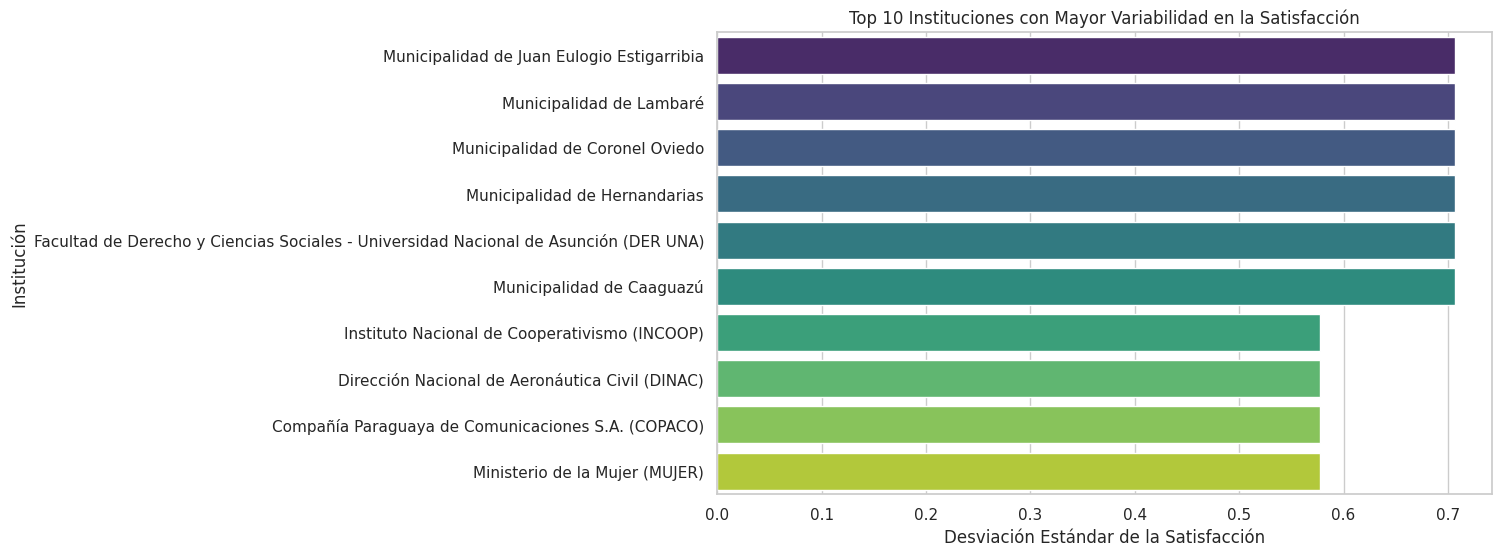

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la desviación estándar de la satisfacción por institución
desviacion_satisfaccion_por_institucion = data.groupby('institucion')['satisfaccion'].std().sort_values(ascending=False).dropna()

# Seleccionar las 10 instituciones con mayor variabilidad en la satisfacción
top_10_variabilidad_instituciones = desviacion_satisfaccion_por_institucion.head(10)

# Graficar la variabilidad de la satisfacción por institución
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_variabilidad_instituciones.values, y=top_10_variabilidad_instituciones.index, palette='viridis')
plt.title('Top 10 Instituciones con Mayor Variabilidad en la Satisfacción')
plt.xlabel('Desviación Estándar de la Satisfacción')
plt.ylabel('Institución')
plt.show()
